In [147]:
import numpy as np
import pandas as pd

# Importing Data

In [148]:
crop = pd.read_csv("Crop_recommendation (2).csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Asq Six Question to yourself

In [149]:
crop.shape

(2200, 8)

In [150]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [151]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [152]:
crop.duplicated().sum()

0

In [153]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.580909,49.444091,39.982727,25.869152,69.701190,6.510458,100.670188
std,36.886745,27.861764,38.558799,5.065932,22.138311,0.861891,56.028915
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,23.194146,56.854201,5.997826,60.745835
50%,37.000000,49.000000,29.000000,25.976541,78.036830,6.460294,90.402966
75%,84.250000,64.000000,46.000000,28.765654,87.456973,6.974978,122.704272
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [154]:
corr = crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.161100,-0.014243,-0.013174,0.256239,0.051512,0.097362
P,-0.161100,1.000000,0.602324,-0.070061,-0.270330,-0.063811,-0.094398
K,-0.014243,0.602324,1.000000,-0.111254,0.093630,-0.091921,-0.078075
temperature,-0.013174,-0.070061,-0.111254,1.000000,0.215868,-0.025862,-0.043419
humidity,0.256239,-0.270330,0.093630,0.215868,1.000000,0.011267,0.117089
ph,0.051512,-0.063811,-0.091921,-0.025862,0.011267,1.000000,-0.102124
rainfall,0.097362,-0.094398,-0.078075,-0.043419,0.117089,-0.102124,1.000000


<AxesSubplot:>

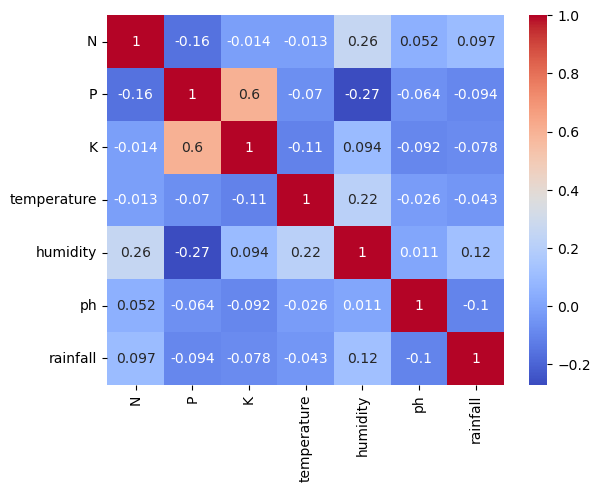

In [155]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [156]:
crop['label'].value_counts()

rice           100
maize          100
coffee         100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
groundnuts     100
Name: label, dtype: int64

c:\Users\91970\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


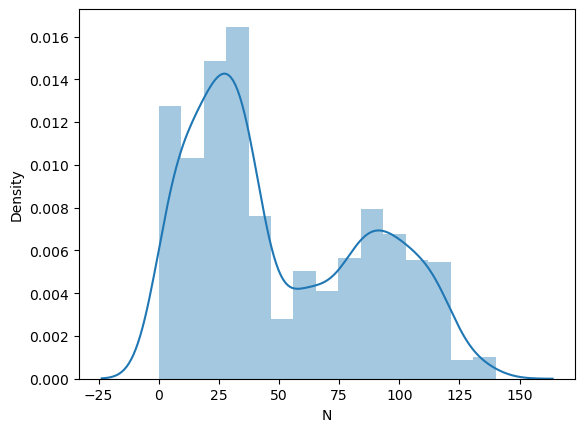

In [157]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

# Encoding

In [158]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'groundnuts': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [159]:
crop['crop_num'].value_counts()

1     100
2     100
22    100
3     100
4     100
5     100
6     100
7     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
8     100
Name: crop_num, dtype: int64

In [160]:
# crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


# Train Test Split

In [161]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [162]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,4,59,22,29.337434,49.003231,8.914075,42.440543
2196,22,51,16,27.965837,61.349001,8.639586,70.104721
2197,33,47,17,24.868040,48.275320,8.621514,63.918765
2198,2,51,17,25.876823,45.963419,5.838509,38.532547


In [163]:
y.shape

(2200,)

In [164]:
from sklearn.model_selection import train_test_split

In [165]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
X_train.shape

(1760, 7)

In [167]:
X_test.shape

(440, 7)

In [168]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,50,46,52,31.182984,90.216469,6.734006,54.018724
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,44,57,53,42.304958,90.514318,6.931721,74.876786
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430



# Scale the features using MinMaxScaler

In [169]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [170]:
X_train

array([[0.35714286, 0.29285714, 0.235     , ..., 0.88606269, 0.50219026,
        0.12098742],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standarization

In [171]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [172]:
X_train

array([[-0.00661431, -0.13371584,  0.28971157, ...,  0.92745608,
         0.25660539, -0.82297539],
       [-0.36102969,  1.03185766, -0.54344589, ..., -0.02348906,
         0.73211864, -0.5506881 ],
       [-1.17891133,  0.8199352 , -0.39196272, ..., -0.3067279 ,
         0.89928587, -0.9788511 ],
       ...,
       [-1.06986045, -0.48691994, -0.24047954, ..., -0.82404077,
        -0.04331125, -0.00488092],
       [-1.06986045,  2.62127607,  4.12728535, ...,  0.46493279,
        -0.17590493, -0.51545104],
       [-0.4973433 ,  0.99653725, -0.4677043 , ..., -0.34211513,
         0.57331317, -0.83376181]])

# Training Models

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9090909090909091
Naive Bayes  with accuracy : 0.9318181818181818
Support Vector Machine  with accuracy : 0.9204545454545454
K-Nearest Neighbors  with accuracy : 0.8886363636363637
Decision Tree  with accuracy : 0.9045454545454545


c:\Users\91970\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Random Forest  with accuracy : 0.9068181818181819
Bagging  with accuracy : 0.9068181818181819
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.8977272727272727
Extra Trees  with accuracy : 0.8272727272727273


In [174]:
rfc = GaussianNB()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9318181818181818

# Predictive System

In [175]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [176]:
N = 200
P = 150
k = 50
temperature = 40.0
humidity = 80
ph = 8
rainfall = 200

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange", 8: "groundnuts", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpeas", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Jute is a best crop to be cultivated 


In [177]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))